## **Fraud Detection - Supervised Classification**

# **Describe Problem Statement**

Fraudulent activities in financial transactions pose significant risks and financial losses to businesses and individuals alike. Detecting such activities in a timely and accurate manner is crucial for minimizing these losses and maintaining trust in financial systems. With the advent of big data and machine learning, it is now possible to analyze vast amounts of transaction data to identify patterns indicative of fraud.

The data set comprised of simulated transactions of credit cards
between January 1, 2020 and December 31, 2020, including both
legitimate and fraudulent transactions in the western side of the United
States of America available at  https://www.kaggle.com/datasets/kartik2112/fraud-detection.

It contains  1296675  rows of observations,
which has 23 columns of variables.


# **Data Description:**

index - Unique Identifier for each
row

trans_date_trans_time - Transaction DateTime

cc_num - Credit Card Number of Customer

merchant - Merchant Name

category - Category of Merchant

amt - Amount of Transaction

first - First Name of Credit Card Holder

last - Last Name of Credit Card Holder

gender - Gender of Credit Card Holder

street - Street Address of Credit Card Holder

city - City of Credit Card Holder

state - State of Credit Card Holder

zip - Zip of Credit Card Holder

lat - Latitude Location of Credit Card Holder

long - Longitude Location of Credit Card Holder

city_pop - Credit Card Holder's City Population

job - Job of Credit Card Holder

dob - Date of Birth of Credit Card Holder

trans_num - Transaction Number

unix_time - UNIX Time of transaction

merch_lat - Latitude Location of Merchant

merch_long - Longitude Location of Merchant

is_fraud - Fraud Flag <--- Target Class




# **Import Necessary Libraries and Understand Variables**

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the data
fraud_df = pd.read_csv('/content/drive/MyDrive/fraud_detection.csv')

In [ ]:
#get first look at data using .head()
fraud_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
# last 5 rows of the data
fraud_df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [ ]:
# shape of the dataset
fraud_df.shape

(1296675, 23)

In [ ]:
# columns in the dataset
fraud_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
# check the datatypes of the features
fraud_df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

- columns trans_date_trans_time and dob are in object format change it to datetime.

In [ ]:
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])
fraud_df['dob'] = pd.to_datetime(fraud_df['dob'])

In [ ]:
#check data types again
fraud_df.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

## **Data Summary**

# **Information/Description of the Data**

In [ ]:
# check information of the dataset
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [ ]:
# description of the dataset
fraud_df.describe()

,Unnamed: 0,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,2019-10-03 12:47:28.070214144,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1973-10-03 19:02:55.017178512,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
min,0.000000e+00,2019-01-01 00:00:18,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1924-10-30 00:00:00,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,2019-06-03 19:12:22.500000,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1962-08-13 00:00:00,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,2019-10-03 07:35:47,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1975-11-30 00:00:00,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,2020-01-28 15:02:55.500000,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1987-02-22 00:00:00,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,2020-06-21 12:13:37,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,2005-01-29 00:00:00,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00
std,3.743180e+05,NaN,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,NaN,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02


In [ ]:
#describe character variables using include parameter
fraud_df.describe(include = 'all')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1296675,1.296675e+06,1296675,1296675,1.296675e+06,1296675,1296675,1296675,1296675,...,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
unique,NaN,NaN,NaN,693,14,NaN,352,481,2,983,...,NaN,NaN,NaN,494,NaN,1296675,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,0069 Robin Brooks Apt. 695,...,NaN,NaN,NaN,Film/video editor,NaN,0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,4403,131659,NaN,26669,28794,709863,3123,...,NaN,NaN,NaN,9779,NaN,1,NaN,NaN,NaN,NaN
mean,6.483370e+05,2019-10-03 12:47:28.070214144,4.171920e+17,NaN,NaN,7.035104e+01,NaN,NaN,NaN,NaN,...,3.853762e+01,-9.022634e+01,8.882444e+04,NaN,1973-10-03 19:02:55.017178512,NaN,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
min,0.000000e+00,2019-01-01 00:00:18,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,...,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,1924-10-30 00:00:00,NaN,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,2019-06-03 19:12:22.500000,1.800429e+14,NaN,NaN,9.650000e+00,NaN,NaN,NaN,NaN,...,3.462050e+01,-9.679800e+01,7.430000e+02,NaN,1962-08-13 00:00:00,NaN,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,2019-10-03 07:35:47,3.521417e+15,NaN,NaN,4.752000e+01,NaN,NaN,NaN,NaN,...,3.935430e+01,-8.747690e+01,2.456000e+03,NaN,1975-11-30 00:00:00,NaN,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,2020-01-28 15:02:55.500000,4.642255e+15,NaN,NaN,8.314000e+01,NaN,NaN,NaN,NaN,...,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,1987-02-22 00:00:00,NaN,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,2020-06-21 12:13:37,4.992346e+18,NaN,NaN,2.894890e+04,NaN,NaN,NaN,NaN,...,6.669330e+01,-6.795030e+01,2.906700e+06,NaN,2005-01-29 00:00:00,NaN,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


The distribution of amt(amount) anf city_pop(population of city) is skewed there's a huge difference between the 75th percentile and the maximum value.

In [ ]:
fraud_df['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

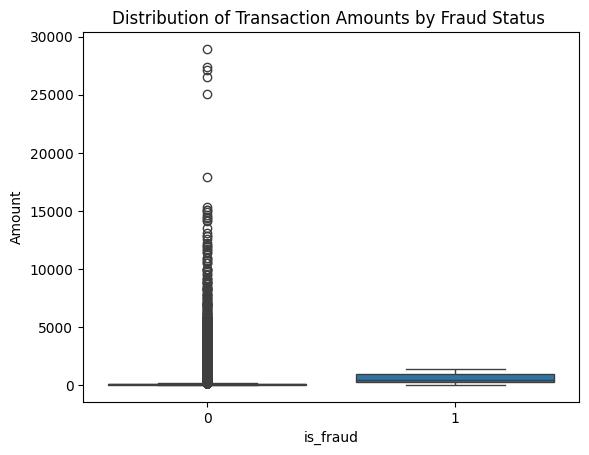

In [ ]:
#plot box chart to see distribution of fraud transactions across amount
sns.boxplot(x='is_fraud', y='amt', data = fraud_df)

#define axes and show
plt.xlabel('is_fraud')
plt.ylabel('Amount')
plt.title('Distribution of Transaction Amounts by Fraud Status ')
plt.show()

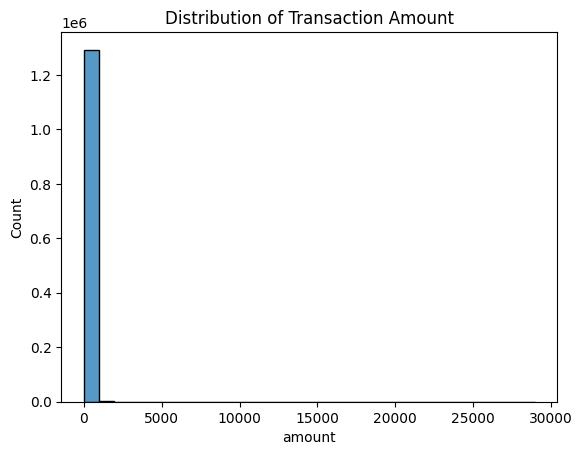

In [ ]:
#see distribution of amount using histofram
sns.histplot( data = fraud_df, x = 'amt', bins = 30)

#define axes and show
plt.xlabel('amount')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amount')
plt.show()

Since data is highly skewed we will only consider transaction values between 1 and 5000

In [ ]:
#filter data frame
fraud_df = fraud_df[(fraud_df['amt'] >= 1) & (fraud_df['amt'] <= 5000) ]

In [ ]:
# check description after dropping
fraud_df['amt'].describe()

count    1.296539e+06
mean     6.942634e+01
std      1.239789e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.751000e+01
75%      8.312000e+01
max      4.986550e+03
Name: amt, dtype: float64

In [ ]:
#new shape
fraud_df.shape

(1296539, 23)

# **Handling duplicates and missing values in the dataset**

In [ ]:
# check for duplicated records
fraud_df.duplicated().sum()

0

In [ ]:
# check for missing values
fraud_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

There are no duplicates and no missing values in dataset


# **Let us create some new features (Feature Engineering)**

Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

In [ ]:
#create new features from trans_date_trans_time
fraud_df['day'] = fraud_df['trans_date_trans_time'].dt.day_name()
fraud_df['month'] = fraud_df['trans_date_trans_time'].dt.month_name()
fraud_df['year'] = fraud_df['trans_date_trans_time'].apply(lambda x: x.year)
fraud_df['hour'] = fraud_df['trans_date_trans_time'].apply(lambda x: x.hour)

In [ ]:
# Calculate age of the cardholder from dob
current_year = datetime.now().year
fraud_df['age'] = current_year - fraud_df['dob'].dt.year

In [ ]:
# top 5 rows of the data
fraud_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,day,month,year,hour,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Tuesday,January,2019,0,36
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Tuesday,January,2019,0,46
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Tuesday,January,2019,0,62
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Tuesday,January,2019,0,57
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Tuesday,January,2019,0,38


In [ ]:
#descriptive stats for age
fraud_df['age'].describe()

count    1.296539e+06
mean     5.074252e+01
std      1.737845e+01
min      1.900000e+01
25%      3.700000e+01
50%      4.900000e+01
75%      6.200000e+01
max      1.000000e+02
Name: age, dtype: float64

# **Exploratory Data Analysis:**

**Analyse Target variable**

<ipython-input-130-9ebc0e716e00>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='is_fraud', data = fraud_df, palette ='Set2')


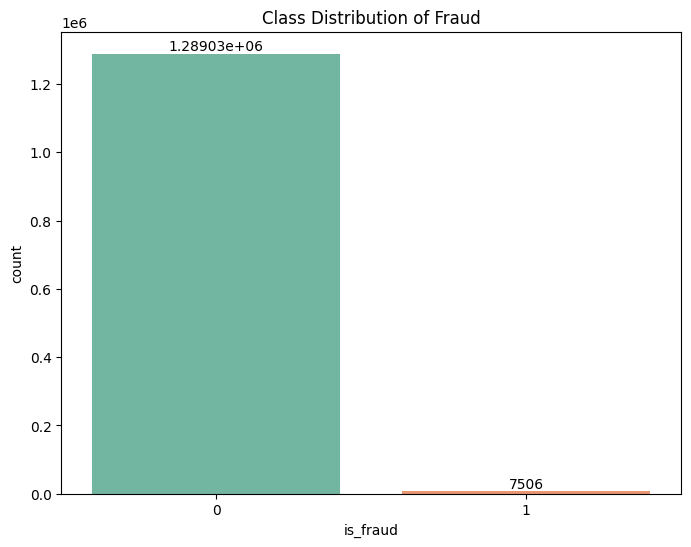

In [ ]:
#target variable analysis
plt.figure(figsize=(8,6))
ax = sns.countplot(x='is_fraud', data = fraud_df, palette ='Set2')

#iterating to find exact count using axis ax object
for bars in ax.containers:
  ax.bar_label(bars)

#add title and display
plt.title('Class Distribution of Fraud')
plt.show()

Data is highly imbalanced we will deal with it later.

**Identify most used category** **and Frauds across different categories.**

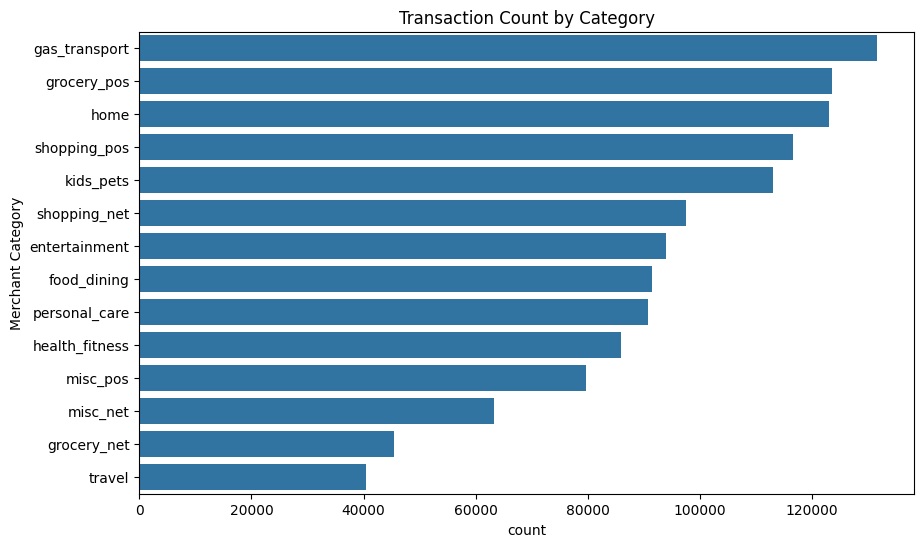

In [ ]:
#plot chart for category of merchants to find most popular one
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=fraud_df, order=fraud_df['category'].value_counts().index)
#define title and axes
plt.ylabel('Merchant Category')
plt.title('Transaction Count by Category')
plt.show()


gas transport is most used merchant category followed by grocery_pos, home, shopping_pos,kids_pets respectively.

In [ ]:
#find frauds by category
category_fraud = fraud_df.groupby('category')['is_fraud'].sum().sort_values(ascending=False).reset_index()
print(category_fraud)


          category  is_fraud
0      grocery_pos      1743
1     shopping_net      1713
2         misc_net       915
3     shopping_pos       843
4    gas_transport       618
5         misc_pos       250
6        kids_pets       239
7    entertainment       233
8    personal_care       220
9             home       198
10     food_dining       151
11     grocery_net       134
12  health_fitness       133
13          travel       116


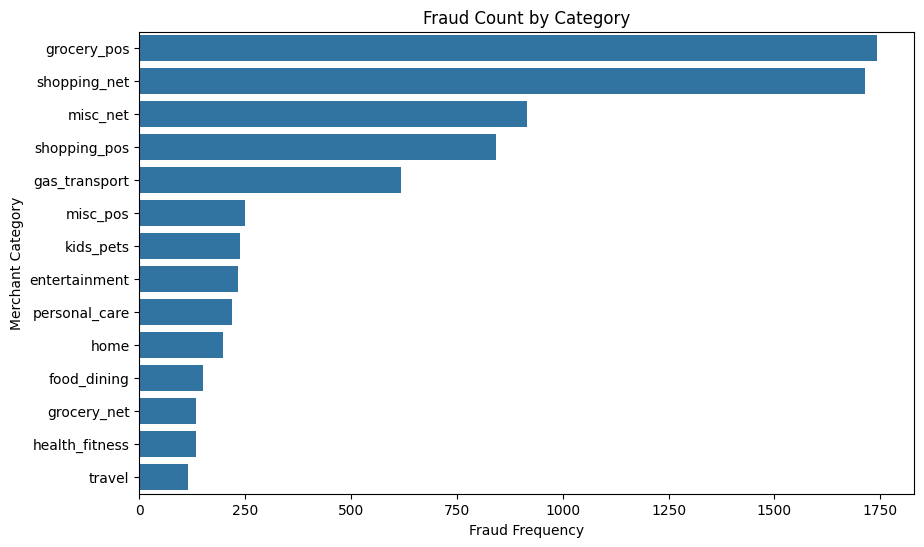

In [ ]:
#assign figure size
plt.figure(figsize=(10, 6))
#plot bar chart category vs fraud
sns.barplot(y='category', x='is_fraud', data = category_fraud)
#axes and display
plt.xlabel('Fraud Frequency')
plt.ylabel('Merchant Category')
plt.title('Fraud Count by Category')
plt.show()


Most number of fraud transactions happened at grocery_pos merchant category followed by shopping_net, misc_net, shopping_pos respectively

**What is prominent age group?**

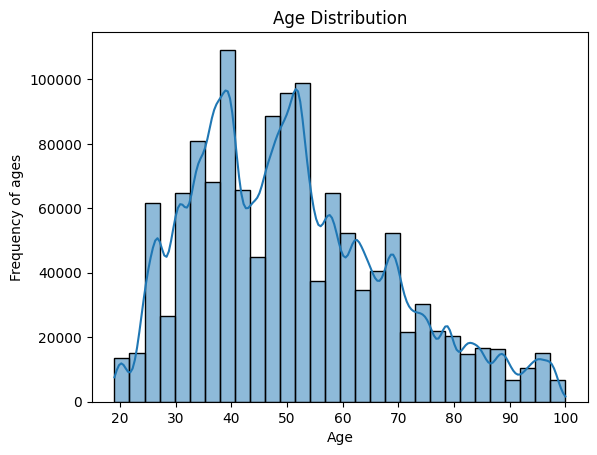

In [ ]:
#Find distribution of ages using histogram
sns.histplot(fraud_df['age'], bins=30, kde=True)
#axes and display
plt.xlabel('Age')
plt.ylabel('Frequency of ages')
plt.title('Age Distribution')
plt.show()

From histogram we can see that data is conccentrated between age group 30 to 60.

**What is gender distribution and percentage of frauds by gender?**

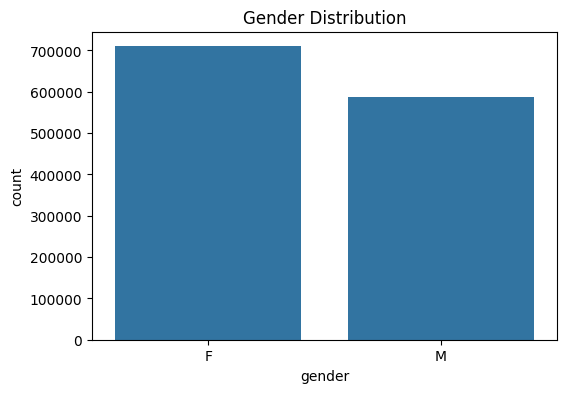

In [ ]:
#Plot for distribution of gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=fraud_df)
plt.title('Gender Distribution')
plt.show()

There are more total transactions recorded for females than for males.This could indicate a higher level of transaction activity among female cardholders in the dataset.

<ipython-input-136-9a7e6410e25e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='fraud_percentage', data=merged_df, palette='viridis')


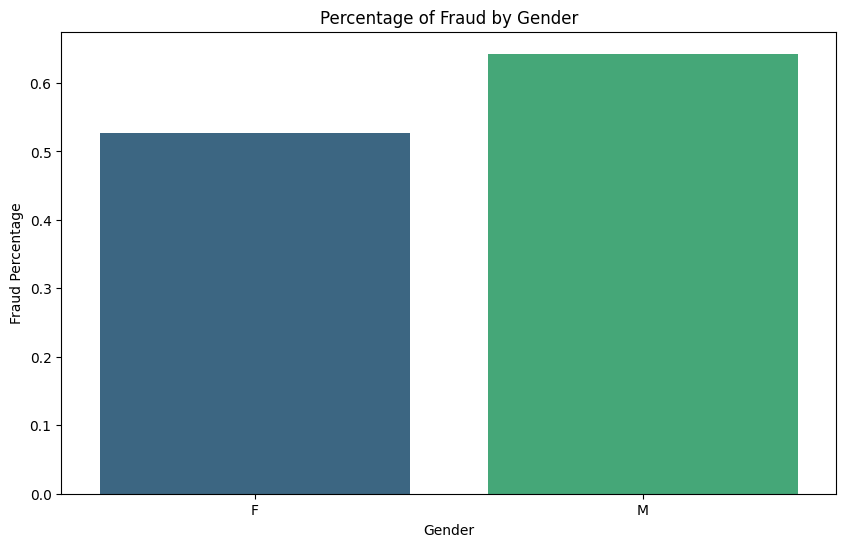

  gender   total  fraudulent  fraud_percentage
0      F  709793        3735          0.526210
1      M  586746        3771          0.642697


In [ ]:
# Calculate the total number of transactions for each gender
total_transactions = fraud_df['gender'].value_counts().reset_index(name='total')

#calculate the fraud transaction
fraud_transactions = fraud_df[fraud_df['is_fraud'] == 1].groupby('gender')['is_fraud'].count().reset_index(name='fraudulent')

# Merge the dataframes on gender
merged_df = pd.merge(total_transactions, fraud_transactions, on='gender')

# Calculate the percentage of fraudulent transactions
merged_df['fraud_percentage'] = (merged_df['fraudulent'] / merged_df['total']) * 100

# Plot the bar plot for fraud percentage by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='fraud_percentage', data=merged_df, palette='viridis')

# Add titles and labels
plt.title('Percentage of Fraud by Gender')
plt.xlabel('Gender')
plt.ylabel('Fraud Percentage')

# Show plot
plt.show()

# Display the merged dataframe with percentages
print(merged_df)


Despite the difference in the total number of transactions, the number of fraudulent transactions is quite similar between genders. Females have 3,735 fraudulent transactions, while males have 3,771.

**When does fraud occurs most?**

In [ ]:
#Calculate daily fraud count
frauds_by_day = fraud_df[fraud_df['is_fraud'] == 1].groupby('day')['is_fraud'].count().reset_index(name='fraud_count')
#arrange them in descending order
frauds_by_day = frauds_by_day.sort_values(by ='fraud_count', ascending = False)

In [ ]:
#print
print(frauds_by_day)

         day  fraud_count
2   Saturday         1227
3     Sunday         1216
1     Monday         1182
0     Friday         1079
4   Thursday         1008
5    Tuesday          935
6  Wednesday          859


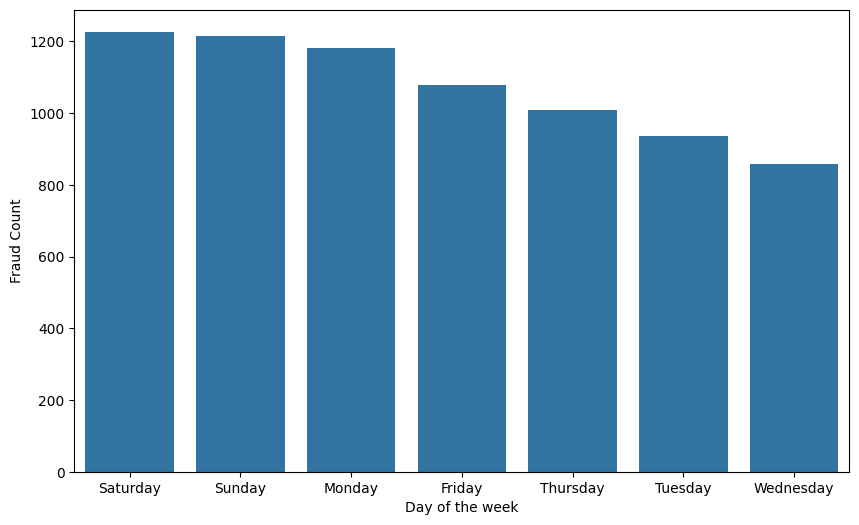

In [ ]:
#plot bar chart for frauds across days
plt.figure(figsize=(10,6))
sns.barplot(x='day', y='fraud_count', data= frauds_by_day)

#name axes and display
plt.xlabel('Day of the week')
plt.ylabel('Fraud Count')
plt.show()

Maximum frauds occured on weekends specially saturday and sunday.

In [ ]:
#calculate fraud over months
frauds_by_months = fraud_df[fraud_df['is_fraud'] == 1].groupby('month')['is_fraud'].count().reset_index(name='monthly_fraud')
#arrange them in descending order
frauds_by_months = frauds_by_months.sort_values(by ='monthly_fraud', ascending = False)

In [ ]:
#print
print(frauds_by_months)

        month  monthly_fraud
7       March            938
8         May            935
3    February            853
4     January            849
6        June            688
0       April            678
2    December            592
10    October            454
11  September            418
9    November            388
1      August            382
5        July            331


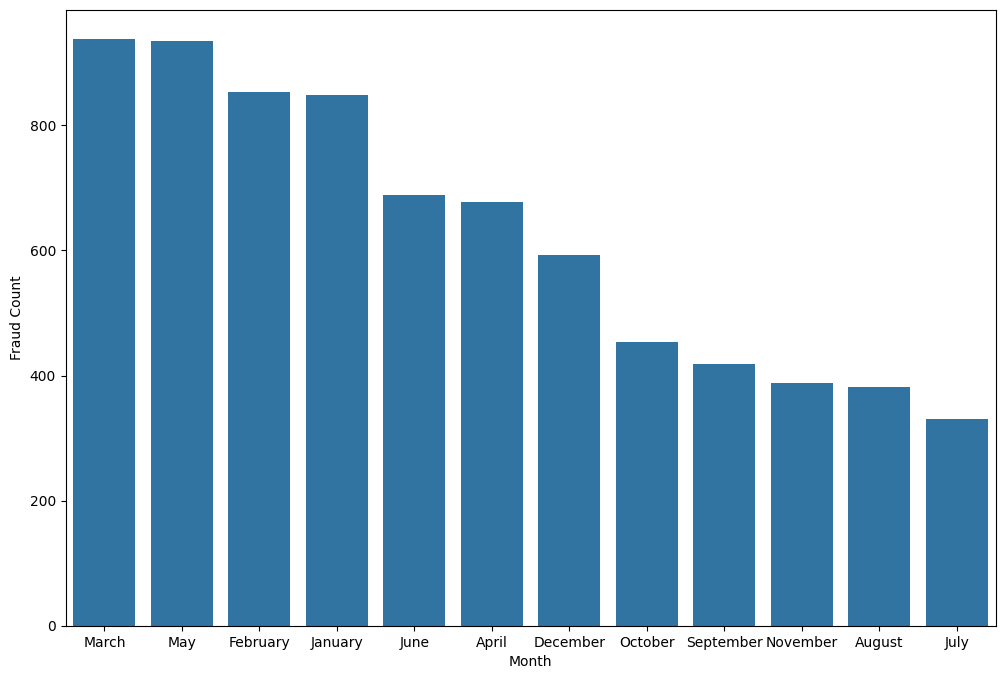

In [ ]:
#plot bar chart for frauds across days
plt.figure(figsize=(12,8))
sns.barplot(x='month', y='monthly_fraud',data=frauds_by_months)

#name axes and display
plt.xlabel('Month')
plt.ylabel('Fraud Count')
plt.show()

Month wise in march month most frauds occured followed by may, february, january and june.

In [ ]:
#calculate fraud over hours
frauds_by_hour = fraud_df[fraud_df['is_fraud'] == 1].groupby('hour')['is_fraud'].count().reset_index(name='hourly_fraud')
#arrange it in descending order
frauds_by_hour = frauds_by_hour.sort_values(by='hourly_fraud', ascending = False)

In [ ]:
print(frauds_by_hour)

    hour  hourly_fraud
22    22          1931
23    23          1904
1      1           658
0      0           635
2      2           625
3      3           609
14    14            86
19    19            81
18    18            81
13    13            80
15    15            79
17    17            78
16    16            76
21    21            74
12    12            67
20    20            62
5      5            60
7      7            56
8      8            49
9      9            47
4      4            46
11    11            42
10    10            40
6      6            40


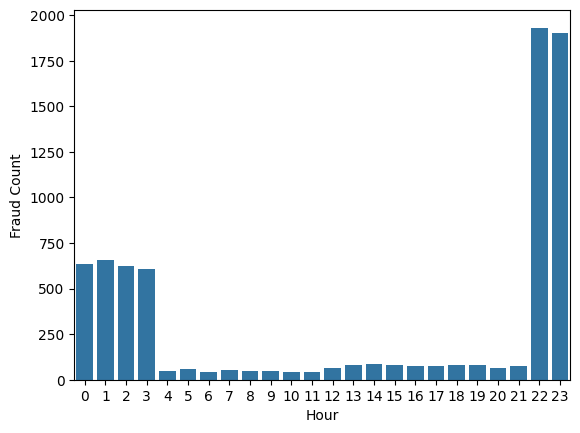

In [ ]:
#plot bar chart for frauds across hours
sns.barplot(x='hour', y='hourly_fraud', data = frauds_by_hour)
#axes and display
plt.xlabel('Hour')
plt.ylabel('Fraud Count')
plt.show()

from this bar chart we can see that most frauds occured last at night between 10pm (22) to 3am.

**Lets check distribution of numerical variable**

<ipython-input-146-e06a28093825>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud_df['amt'])


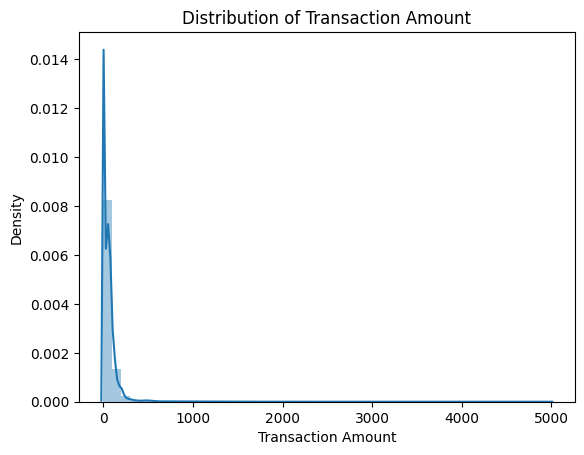

In [ ]:
#plot distribution of amt using displot
sns.distplot(fraud_df['amt'])
#define title and axes
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.title('Distribution of Transaction Amount')
plt.show()

The distribution of all the variables are heavily right skewed.

We will apply log transformation on these variables to make it less skewed.

<ipython-input-147-a2129ee78e67>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(fraud_df['amt']))


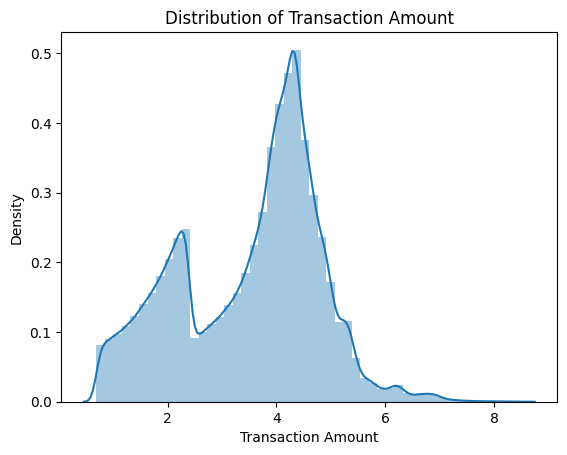

In [ ]:
# taking a log transformation
sns.distplot(np.log1p(fraud_df['amt']))
#define title and axes
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.title('Distribution of Transaction Amount')
plt.show()

The variables after log transformation are less skewed than before.

**Percentage of fraud by cities**

In [ ]:
#Calculate the total number of transactions for each city
transaction_by_cities = fraud_df['city'].value_counts().reset_index(name='Trans_city')

# Filter cities with over 100 transactions
transaction_by_cities = transaction_by_cities[transaction_by_cities['Trans_city'] > 100]

#calculate the fraud transaction
fraud_transactions_city = fraud_df[fraud_df['is_fraud'] == 1].groupby('city')['is_fraud'].count().reset_index(name='fraud_cities')

# Merge the dataframes on gender
merged_df_city = pd.merge(transaction_by_cities, fraud_transactions_city, on='city')

#calculate percentage of fraudulent transaction
merged_df_city['fraud_percentage'] = (merged_df_city['fraud_cities'] / merged_df_city['Trans_city']) * 100

#arrange dataframe in descending order of fraud_percentage
merged_df_city = merged_df_city.sort_values(by='fraud_percentage', ascending = False)

In [ ]:
print(merged_df_city)

               city  Trans_city  fraud_cities  fraud_percentage
594          Aurora         512            23          4.492188
506      Clearwater         553            24          4.339964
526          Benton         530            17          3.207547
580          Moscow         516            16          3.100775
634         Boulder         493            15          3.042596
..              ...         ...           ...               ...
53        Grandview        3036             3          0.098814
48         Florence        3046             3          0.098490
46      Tupper Lake        3055             3          0.098200
108  Denham Springs        2540             2          0.078740
3           Phoenix        5075             2          0.039409

[644 rows x 4 columns]


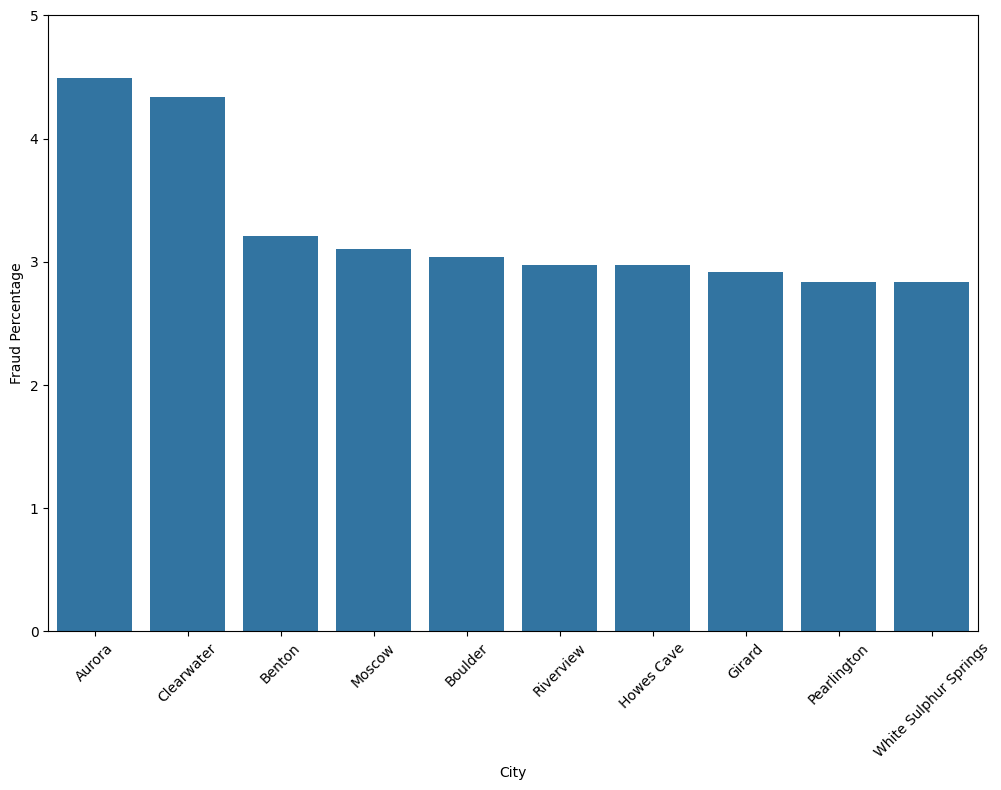

In [ ]:
# Plot the bar plot for fraud percentage by cities
plt.figure(figsize=(12,8))
sns.barplot(x='city', y='fraud_percentage', data = merged_df_city[:10])
plt.xlabel('City')
plt.ylabel('Fraud Percentage')
plt.ylim([0.0,5.0])
plt.xticks(rotation =45)
plt.show()

Aurora is city with maximum percentage of fraud transactions followed by Clearwater, Benton, Moscow, Boulder.

# **Handle Imbalance in Dataset.**

In [ ]:
#class count
class_0, class_1 = fraud_df['is_fraud'].value_counts()

# Separate class
class_0 = fraud_df[fraud_df['is_fraud'] == 0]
class_1 = fraud_df[fraud_df['is_fraud'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1289033, 28)
class 1: (7506, 28)


Data set is highly imabalanced we will do undersampling - removing some observations of the majority class

In [ ]:
#droping target variable
ind_fraud_df = fraud_df.drop('is_fraud', axis =1)

In [ ]:
#import package
from imblearn.under_sampling import RandomUnderSampler

#apply undersampling technique
rus = RandomUnderSampler(random_state=42,replacement = True)
x_rus, y_rus = rus.fit_resample(ind_fraud_df, fraud_df['is_fraud'])

#print original and resampled dataset
print('Original dataset shape:', len(fraud_df))
print('Resampled dataset shape', len(y_rus))

Original dataset shape: 1296539
Resampled dataset shape 15012


In [ ]:
# combine independent and dependent variables
resampled_df = x_rus.copy()
resampled_df['is_fraud'] = y_rus

In [ ]:
#final dataset shape
resampled_df.shape

(15012, 28)

# **Encoding Categorical variables**

In [ ]:
#check descriptive stats for categorical variables
resampled_df.select_dtypes(include = ['object']).describe()

,merchant,category,first,last,gender,street,city,state,job,trans_num,day,month
count,15012,15012,15012,15012,15012,15012,15012,15012,15012,15012,15012,15012
unique,693,14,350,479,2,977,889,51,492,14985,7,12
top,fraud_Cormier LLC,grocery_pos,Christopher,Smith,F,561 Little Plain Apt. 738,Houston,NY,Naval architect,e1a53f1448f25e7e0522dc443c3504d4,Sunday,May
freq,79,2481,325,308,7862,39,63,1052,107,2,2702,1821


Since categorical variables are highly cardinal we will apply Label Encoding.

**Label Encoding assigns a unique numerical label to each category.**

In [ ]:
!pip install category_encoders

In [ ]:
#import package
import category_encoders as ce
#apply label encoding
Label_encoder = ce.OrdinalEncoder()
#create new df
df_encoded = resampled_df.copy()
#for loop to iterate over categorical variables
for col in resampled_df.columns:
  if resampled_df[col].dtype == 'object':
    df_encoded[col] = Label_encoder.fit_transform(resampled_df[col])

# **Logistic Regression Model**

In [ ]:
#import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [ ]:
#Split the resampled data into features and target
x = df_encoded.drop('is_fraud', axis=1)
y = df_encoded['is_fraud']

In [ ]:
# Check for datetime columns and exclude them
datetime_columns = x.select_dtypes(include=['datetime','datetime64']).columns
x = x.drop(columns = datetime_columns)

In [ ]:
#apply scaling using standard scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
#split data into train and test set
X_train,X_test,Y_train,Y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 42)
print(X_train.shape)
print(X_test.shape)

(12009, 25)
(3003, 25)


In [ ]:
Y_train.value_counts()

is_fraud
1    6010
0    5999
Name: count, dtype: int64

In [ ]:
Y_test.value_counts()

is_fraud
0    1507
1    1496
Name: count, dtype: int64

In [ ]:
#Fitting logistic regression on train data
clf = LogisticRegression()
clf.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

# **Evaluate the model**

[[1498    9]
 [   0 1496]]


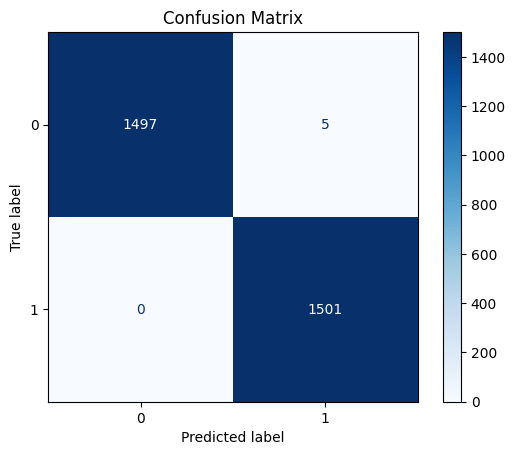

In [ ]:
#for test datset confusion matrix
cm_test = confusion_matrix(Y_test, test_class_preds)
print(cm_test)

#display the test confusion matrix
dist = ConfusionMatrixDisplay(confusion_matrix =cm_test, display_labels =clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Get the accuracy scores
test_accuracy = accuracy_score(Y_test, test_class_preds)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.997002997002997


In [ ]:
#precision scores
test_precision = precision_score(Y_test, test_class_preds)
print("Test Precision:", test_precision)

Test Precision: 0.9940199335548173


In [ ]:
# Get the roc_auc_score scores
test_roc_auc_score = roc_auc_score(Y_test,test_preds[:,1])
print("The roc_auc_score on test data is ", test_roc_auc_score)

The roc_auc_score on test data is  0.9999951208087747


In [ ]:
#performing cross validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, x_scaled, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.90909091 1.         1.         1.         0.94736842]
Mean Cross-Validation Accuracy: 0.9712918660287082
